# **Adult Census Income Dataset**

# **Import Libraries and Data**

In [ ]:
!pip install xgboost imblearn

     |████████████████████████████████| 157.5 MB 130 kB/s 
     |████████████████████████████████| 206 kB 69.9 MB/s 
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
# number wrangling and data manipulation libraries
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Model selection
from sklearn.model_selection import train_test_split, GridSearchCV

# Preprocessing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Sampling
from imblearn.over_sampling import KMeansSMOTE

# machine learning
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE 

# Metrics
from sklearn.metrics import classification_report, f1_score
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix # untuk membuat specificity
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer

## Adding Column Name to dataset

In [ ]:
columns = ["age", "workClass", "fnlwgt", "education", "education-num","marital-status", "occupation", "relationship",
          "race", "sex", "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

In [ ]:
df_train = pd.read_csv('/datasets/driveazharie/Projek/Projek_Adult_Income/adult.data', names=columns,sep=' *, *', na_values='?')
df_test = pd.read_csv('/datasets/driveazharie/Projek/Projek_Adult_Income/adult.test',names=columns, sep=' *, *', skiprows=1, na_values='?')
df_train

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# **Exploratory Data Analysis**

## Checking Missing Value

<AxesSubplot:>

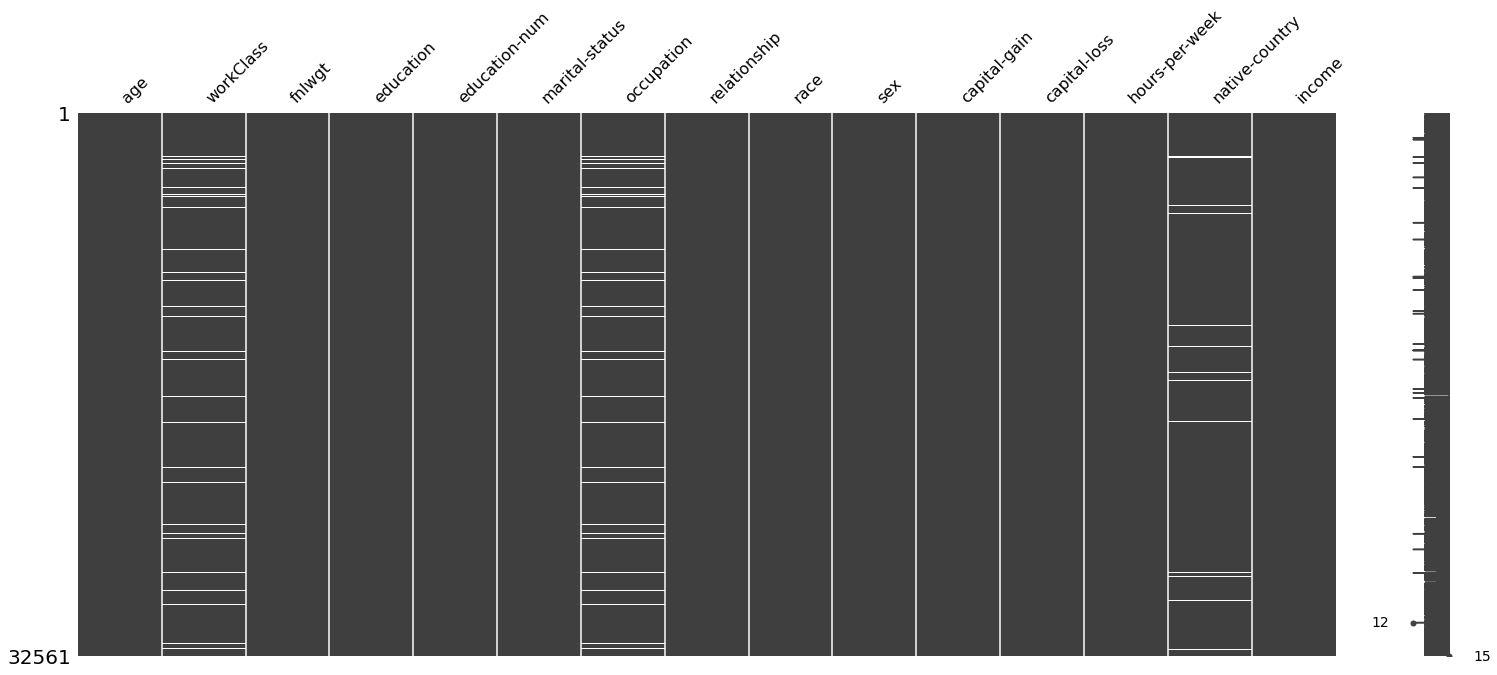

In [ ]:
import missingno as msno
msno.matrix(df_train.sample(32561))

<AxesSubplot:>

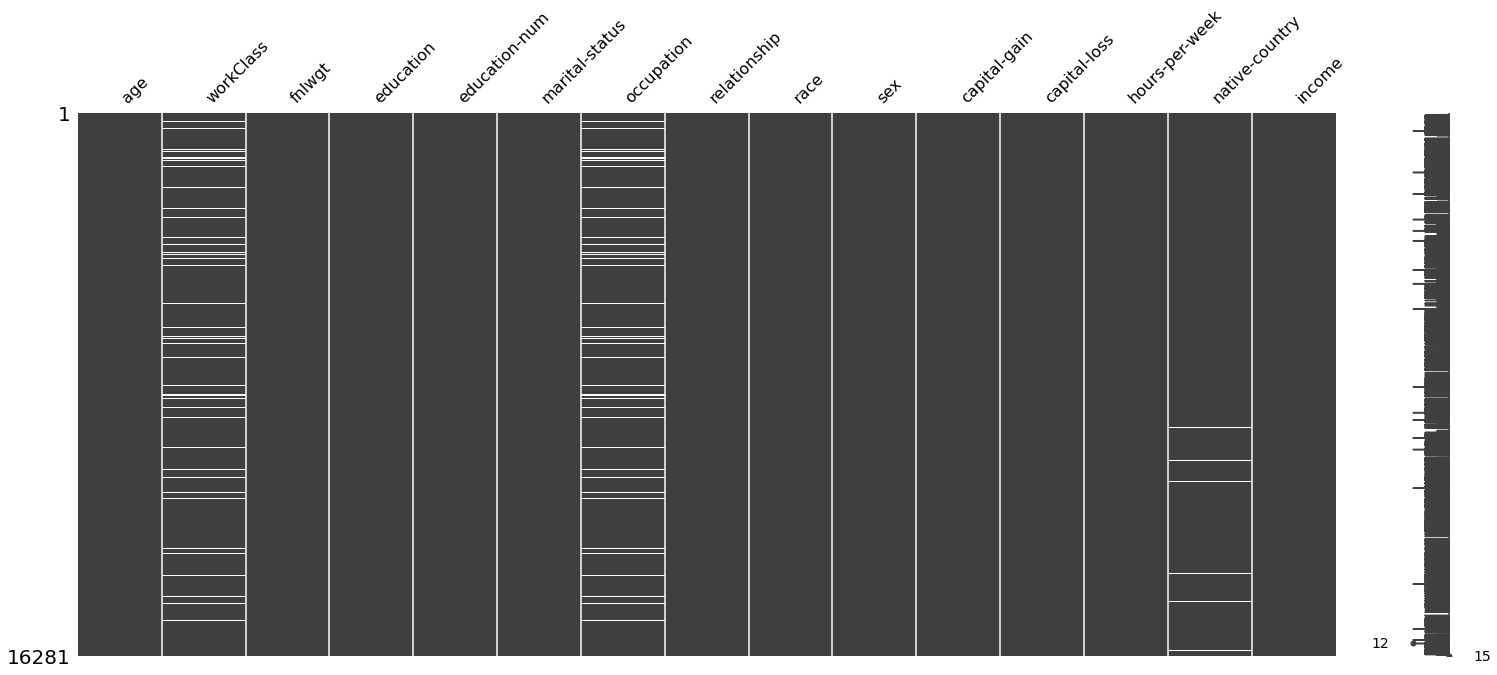

In [ ]:
msno.matrix(df_test.sample(16281))

In [ ]:
def null_table(training, testing):
  print("Training Data Frame")
  print(pd.isnull(training).sum())
  print(" ")
  print("Testing Data Frame")
  print(pd.isnull(testing).sum())

null_table(df_train, df_test)

Training Data Frame
age                  0
workClass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64
 
Testing Data Frame
age                 0
workClass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64


## Data Describe

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workClass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [ ]:
df_train.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


## Data Vizualization

In [ ]:
def targetTo(data,column,size=(8, 10)):
    plt.figure(figsize=size)
    plt.subplot(2,1,1)
    sns.countplot(data[column], hue=data['income'])

    ratio = [data[column][(data[column]==i)&(data['income']==1)].count()/data[column][(data[column]==i)&(data['income']==0)].count() for i in data[column].unique()]
    plt.subplot(2,1,2)
    sns.barplot(x=data[column].unique(),y=ratio,palette='Set2')

<AxesSubplot:xlabel='income', ylabel='count'>

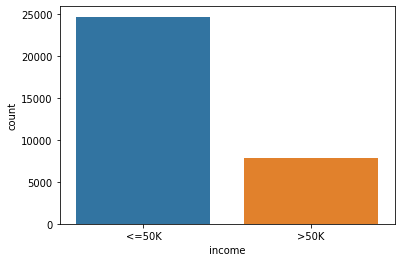

In [ ]:
sns.countplot(x="income", data=df_train)

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


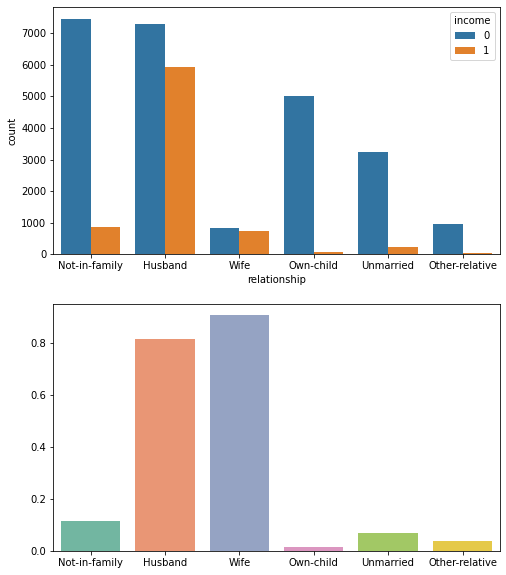

In [ ]:
targetTo(df_train,'relationship')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


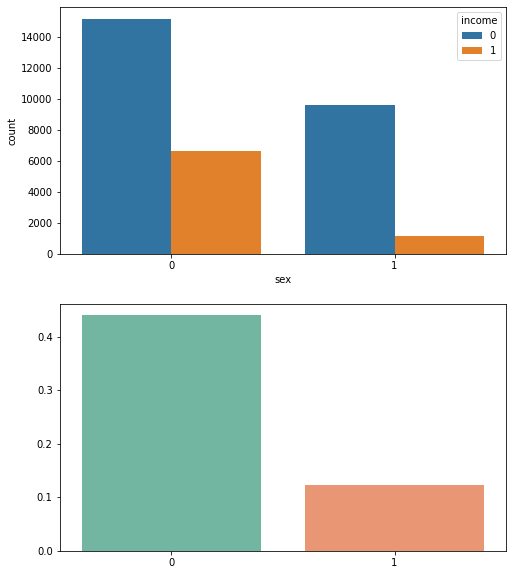

In [ ]:
targetTo(df_train,'sex')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


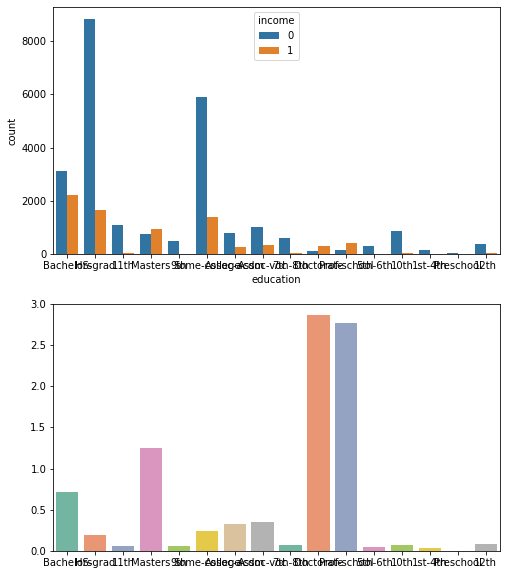

In [ ]:
targetTo(df_train,'education')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


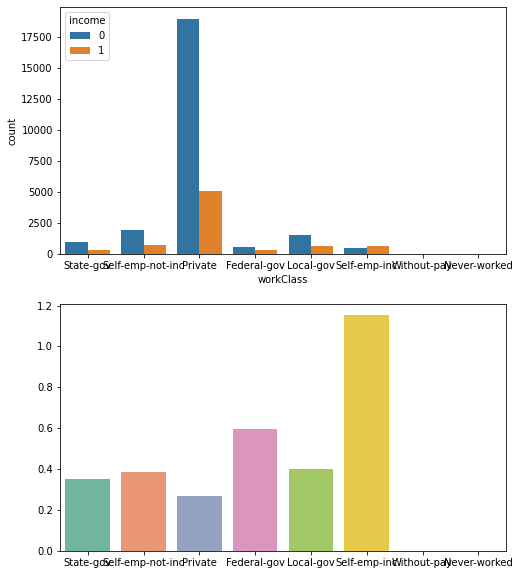

In [ ]:
targetTo(df_train,'workClass')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


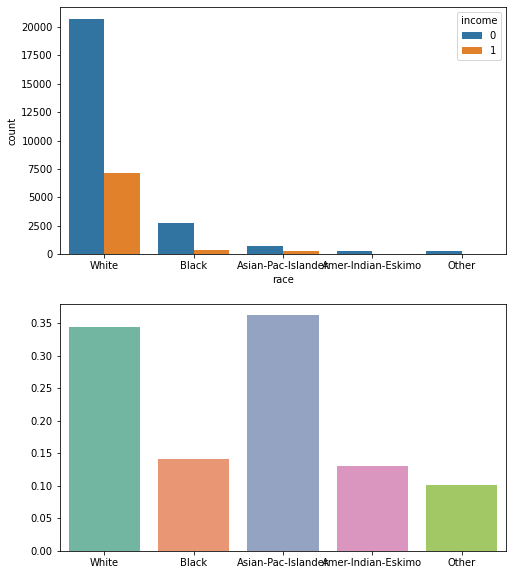

In [ ]:
targetTo(df_train,'race')

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


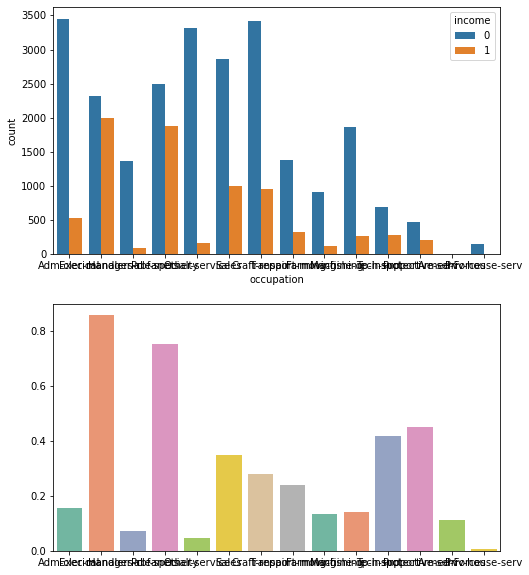

In [ ]:
targetTo(df_train,'occupation')


/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


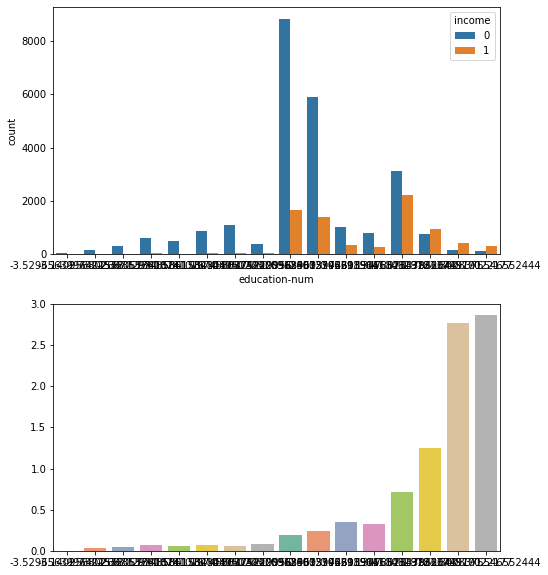

In [ ]:
targetTo(df_train,'education-num')

In [ ]:
num_attributes = df_train.select_dtypes(include=['int'])
print(num_attributes.columns)

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'fnlwgt'}>],
       [<AxesSubplot:title={'center':'education-num'}>,
        <AxesSubplot:title={'center':'capital-gain'}>],
       [<AxesSubplot:title={'center':'capital-loss'}>,
        <AxesSubplot:title={'center':'hours-per-week'}>]], dtype=object)

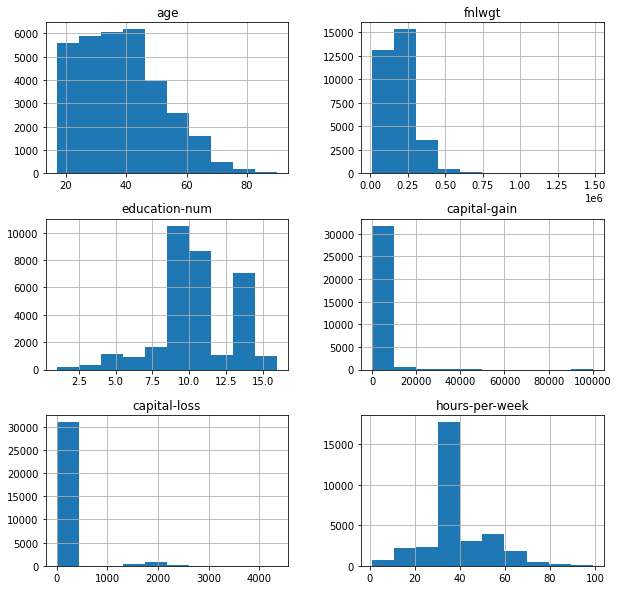

In [ ]:
num_attributes.hist(figsize=(10,10))

## Data Correlation 

In [ ]:
import phik
df_train.phik_matrix()

interval columns not set, guessing: ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']


,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
age,1.000000,0.191656,0.080248,0.275658,0.311026,0.501631,0.233640,0.474367,0.064178,0.159903,0.110459,0.099730,0.436789,0.086522,0.412058
workClass,0.191656,1.000000,0.048854,0.275797,0.178016,0.142358,0.513920,0.158850,0.090048,0.190734,0.091902,0.046830,0.209700,0.078449,0.217778
fnlwgt,0.080248,0.048854,1.000000,0.044272,0.058136,0.045357,0.047193,0.033147,0.157680,0.037121,0.000000,0.000000,0.041320,0.159141,0.007811
education,0.275658,0.275797,0.044272,1.000000,1.000000,0.192843,0.500083,0.246829,0.140505,0.118698,0.230071,0.101625,0.227350,0.421242,0.467291
education-num,0.311026,0.178016,0.058136,1.000000,1.000000,0.162585,0.502247,0.214847,0.163811,0.120881,0.188362,0.087755,0.273804,0.429529,0.469457
marital-status,0.501631,0.142358,0.045357,0.192843,0.162585,1.000000,0.334665,0.677521,0.130107,0.430811,0.062185,0.112672,0.230415,0.157434,0.417424
occupation,0.233640,0.513920,0.047193,0.500083,0.502247,0.334665,1.000000,0.344358,0.153329,0.551216,0.143029,0.078170,0.315273,0.225002,0.444802
relationship,0.474367,0.158850,0.033147,0.246829,0.214847,0.677521,0.344358,1.000000,0.143665,0.842946,0.118397,0.128239,0.297866,0.179910,0.622594
race,0.064178,0.090048,0.157680,0.140505,0.163811,0.130107,0.153329,0.143665,1.000000,0.096122,0.011870,0.018764,0.141959,0.710375,0.081901
sex,0.159903,0.190734,0.037121,0.118698,0.120881,0.430811,0.551216,0.842946,0.096122,1.000000,0.067209,0.070589,0.315017,0.066666,0.332578


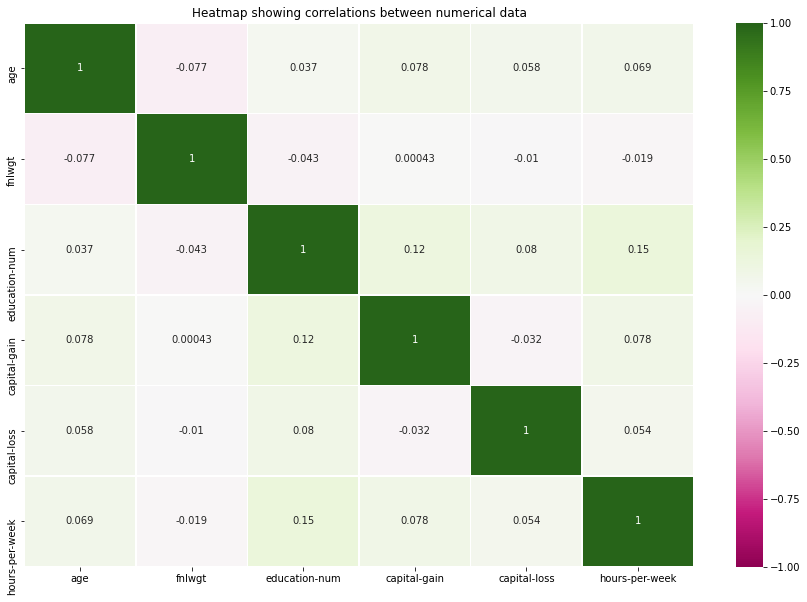

In [ ]:
plt.figure(figsize=(15,10))  
sns.heatmap(df_train.corr(),annot=True,vmin=-1.0,vmax=1.0,linewidths=.5, cmap="PiYG")
plt.title('Heatmap showing correlations between numerical data')
plt.show()

# **Data Preprocessing**

In [ ]:
column_categorical_encode = [ 'education', 'marital-status', 'occupation',
                        'relationship']

columns_numerical_normaliz = [ 'age', 'education-num', 'hours-per-week', 
                         'capital-gain', 'capital-loss' ,'sex']

In [ ]:
df_train

,age,workClass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Imputing Missing Value

In [ ]:
#Impute Missing Value
df_train['workClass'] = df_train['workClass'].fillna(df_train['workClass'].ffill())
df_test['workClass'] = df_test['workClass'].fillna(df_test['workClass'].ffill())

df_train['occupation'] = df_train['occupation'].fillna(df_train['occupation'].ffill())
df_test['occupation'] = df_test['occupation'].fillna(df_test['occupation'].ffill())

df_train['native-country'] = df_train['native-country'].fillna(df_train['native-country'].ffill())
df_test['native-country'] = df_test['native-country'].fillna(df_test['native-country'].ffill())

In [ ]:
null_table(df_train, df_test)

Training Data Frame
age               0
workClass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64
 
Testing Data Frame
age               0
workClass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income            0
dtype: int64


## Data Mapping and Labelling

In [ ]:
income_label = {"<=50K": 0, ">50K": 1}
income_label_test = {"<=50K.": 0, ">50K.": 1}
sex_label = {"Male": 0, "Female": 1}

df_train["income"] = df_train["income"].map(income_label)
df_test["income"] = df_test["income"].map(income_label_test)

df_train["sex"] = df_train["sex"].map(sex_label)
df_test["sex"] = df_test["sex"].map(sex_label)

In [ ]:
drop_features = ["fnlwgt", "race", "workClass", "native-country"]

df_train_ready = df_train.drop(columns=drop_features,axis =1)
df_test_ready = df_test.drop(columns=drop_features,axis =1)

## Scalling Normalization

In [ ]:
st = StandardScaler()
df_train_ready[columns_numerical_normaliz] = st.fit_transform(df_train[columns_numerical_normaliz])
df_test_ready[columns_numerical_normaliz] = st.transform(df_test[columns_numerical_normaliz])

## Encoding Categorical Label

In [ ]:
ohe = OneHotEncoder(sparse=False, handle_unknown="ignore")
transformed_train = ohe.fit_transform(df_train_ready[column_categorical_encode])
transformed_test = ohe.transform(df_test_ready[column_categorical_encode])

ohe_train = pd.DataFrame(transformed_train, columns=ohe.get_feature_names(), index=df_train_ready.index)
ohe_test = pd.DataFrame(transformed_test, columns=ohe.get_feature_names(), index=df_test_ready.index)

df_train_ready = pd.concat([df_train_ready, ohe_train], axis=1).drop(column_categorical_encode, axis=1)
df_test_ready = pd.concat([df_test_ready, ohe_test], axis=1).drop(column_categorical_encode, axis=1)

In [ ]:
df_train_ready

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,income,x0_10th,x0_11th,x0_12th,...,x2_Protective-serv,x2_Sales,x2_Tech-support,x2_Transport-moving,x3_Husband,x3_Not-in-family,x3_Other-relative,x3_Own-child,x3_Unmarried,x3_Wife
0,0.030671,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.837109,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.042642,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.057047,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.775768,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.746039,1.422331,-0.145920,-0.21666,-0.197409,0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.103983,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32558,1.423610,-0.420060,1.422331,-0.145920,-0.21666,-0.035429,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32559,-1.215643,-0.420060,-0.703071,-0.145920,-0.21666,-1.655225,0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Data Split

In [ ]:
y_train = df_train_ready["income"]
X_train = df_train_ready.drop(columns=["income"], axis=1)

y_test = df_test_ready["income"]
X_test = df_test_ready.drop(columns=["income"], axis=1)

X_train.head()

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,x0_10th,x0_11th,x0_12th,x0_1st-4th,...,x2_Protective-serv,x2_Sales,x2_Tech-support,x2_Transport-moving,x3_Husband,x3_Not-in-family,x3_Other-relative,x3_Own-child,x3_Unmarried,x3_Wife
0,0.030671,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.837109,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.042642,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.057047,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.775768,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


# **Modelling**

KMeansSMOTE OverSampling

In [ ]:
samplers = KMeansSMOTE(random_state=42)
X_train_resampled, y_train_resampled = samplers.fit_resample(X_train, y_train)

In [ ]:
X_train

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,x0_10th,x0_11th,x0_12th,x0_1st-4th,...,x2_Protective-serv,x2_Sales,x2_Tech-support,x2_Transport-moving,x3_Husband,x3_Not-in-family,x3_Other-relative,x3_Own-child,x3_Unmarried,x3_Wife
0,0.030671,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.837109,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.042642,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.057047,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.775768,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849080,0.746039,1.422331,-0.145920,-0.21666,-0.197409,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
32557,0.103983,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
32558,1.423610,-0.420060,1.422331,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
32559,-1.215643,-0.420060,-0.703071,-0.145920,-0.21666,-1.655225,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## **Model Comparing**

In [ ]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: l

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

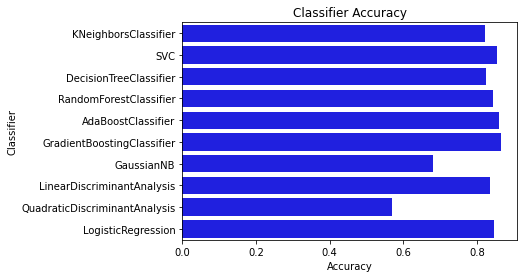

In [ ]:
classifiers = [
               KNeighborsClassifier(3),
               SVC(probability=True),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X= X_train.iloc[:, :].values
y = y_train.values

acc_dict = {}

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
      acc_dict[name] += acc
    else:
      acc_dict[name] = acc

for clf in acc_dict:
  acc_dict[clf] = acc_dict[clf] / 10.0
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.barplot(x='Accuracy', y='Classifier', data=log, color='b')

In [ ]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.823611
0,SVC,0.853792
0,DecisionTreeClassifier,0.826128
0,RandomForestClassifier,0.843291
0,AdaBoostClassifier,0.860792
0,GradientBoostingClassifier,0.866656
0,GaussianNB,0.682346
0,LinearDiscriminantAnalysis,0.836967
0,QuadraticDiscriminantAnalysis,0.569850
0,LogisticRegression,0.847866


## **With Oversampling Method**

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


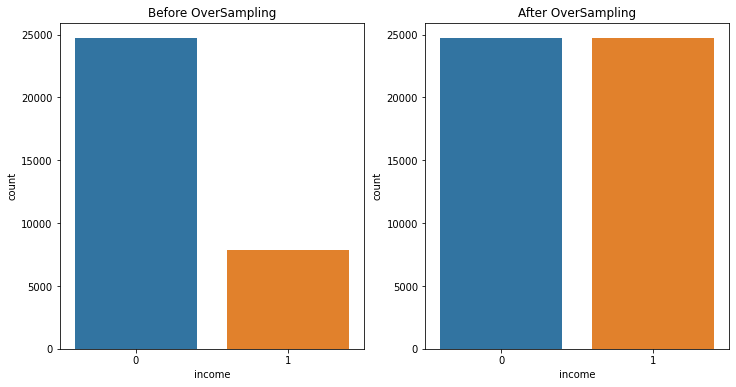

In [ ]:
plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
sns.countplot(y_train)
plt.title('Before OverSampling')

plt.subplot(1,2,2)
sns.countplot(y_train_resampled)
plt.title('After OverSampling')

plt.show()

/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:808: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
/shared-libs/python3.7/py/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: l

<AxesSubplot:title={'center':'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

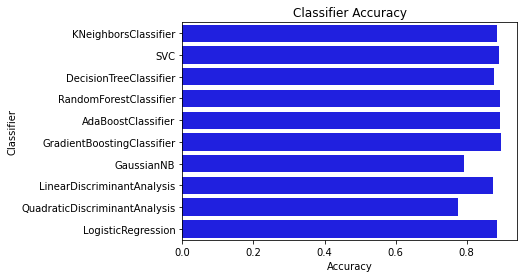

In [ ]:
classifiers = [
               KNeighborsClassifier(3),
               SVC(probability=True),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               AdaBoostClassifier(),
               GradientBoostingClassifier(),
               GaussianNB(),
               LinearDiscriminantAnalysis(),
               QuadraticDiscriminantAnalysis(),
               LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log2 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X= X_train_resampled.iloc[:, :].values
y = y_train_resampled.values

acc_dict = {}

for train_index, test_index in sss.split(X, y):
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  for clf in classifiers:
    name = clf.__class__.__name__
    clf.fit(X_train, y_train)
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    if name in acc_dict:
      acc_dict[name] += acc
    else:
      acc_dict[name] = acc

for clf in acc_dict:
  acc_dict[clf] = acc_dict[clf] / 10.0
  log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
  log2 = log2.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.barplot(x='Accuracy', y='Classifier', data=log2, color='b')

In [ ]:
log2

,Classifier,Accuracy
0,KNeighborsClassifier,0.884671
0,SVC,0.890799
0,DecisionTreeClassifier,0.878463
0,RandomForestClassifier,0.894823
0,AdaBoostClassifier,0.893974
0,GradientBoostingClassifier,0.897715
0,GaussianNB,0.793974
0,LinearDiscriminantAnalysis,0.873124
0,QuadraticDiscriminantAnalysis,0.775147
0,LogisticRegression,0.884408


In [ ]:
X_train_resampled

,age,education-num,sex,capital-gain,capital-loss,hours-per-week,x0_10th,x0_11th,x0_12th,x0_1st-4th,...,x2_Protective-serv,x2_Sales,x2_Tech-support,x2_Transport-moving,x3_Husband,x3_Not-in-family,x3_Other-relative,x3_Own-child,x3_Unmarried,x3_Wife
0,0.030671,1.134739,-0.703071,0.148453,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.837109,1.134739,-0.703071,-0.145920,-0.21666,-2.222153,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,-0.042642,-0.420060,-0.703071,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.057047,-1.197459,-0.703071,-0.145920,-0.21666,-0.035429,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,-0.775768,1.134739,1.422331,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49436,1.038603,1.134739,-0.703071,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49437,-0.446796,1.134739,-0.703071,-0.145920,-0.21666,0.774468,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
49438,0.511548,1.523438,-0.703071,-0.145920,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
49439,0.543859,1.134739,-0.703071,0.251710,-0.21666,-0.035429,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


## **Model Select SVC**

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, f1_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV , train_test_split

parameters = {
    'C': [0.1, 1, 10, 100, 1000], 
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
}

model_svc = SVC(random_state=42)

#gscv = GridSearchCV(
#    model_svc, 
#    parameters,
#    verbose = 3, 
#    cv=10,
#    scoring='f1_micro'
#)
#gscv.fit(X, y)
rscv_svc = RandomizedSearchCV(model_svc, parameters,n_iter=5, cv=5, scoring="f1_micro",verbose = 3,error_score=0)
rscv_svc.fit(X_train_resampled,y_train_resampled)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV 1/5] END ................................C=10, gamma=0.1; total time= 1.3min
[CV 2/5] END ................................C=10, gamma=0.1; total time= 1.6min
[CV 3/5] END ................................C=10, gamma=0.1; total time= 1.7min
[CV 4/5] END ................................C=10, gamma=0.1; total time= 1.7min
[CV 5/5] END ................................C=10, gamma=0.1; total time= 1.7min
[CV 1/5] END ...............................C=10, gamma=0.01; total time=  34.9s
[CV 2/5] END ...............................C=10, gamma=0.01; total time=  38.9s
[CV 3/5] END ...............................C=10, gamma=0.01; total time=  46.2s
[CV 4/5] END ...............................C=10, gamma=0.01; total time=  45.9s
[CV 5/5] END ...............................C=10, gamma=0.01; total time=  47.3s
[CV 1/5] END ...............................C=0.1, gamma=0.1; total time=  38.0s
[CV 2/5] END ...............................C=0.1

RandomizedSearchCV(cv=5, error_score=0, estimator=SVC(random_state=42),
                   n_iter=5,
                   param_distributions={'C': [0.1, 1, 10, 100, 1000],
                                        'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
                   scoring='f1_micro', verbose=3)

In [ ]:
print(rscv_svc.best_score_)
print(rscv_svc.best_params_)

0.8803246231388477
{'gamma': 0.1, 'C': 10}


In [ ]:
model_svc = rscv_svc.best_estimator_

In [ ]:
y_pred_svc = model_svc.predict(X_test)
score_svc = f1_score(y_test, y_pred_svc)
score_svc

0.647838308124749

In [ ]:
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.89      0.90      0.90     12435
           1       0.67      0.63      0.65      3846

    accuracy                           0.84     16281
   macro avg       0.78      0.77      0.77     16281
weighted avg       0.84      0.84      0.84     16281



# Search Tuning

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:25:03] WARNING: ../src/learner.cc:541: 
Parameters: { C } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:25:03] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to rest

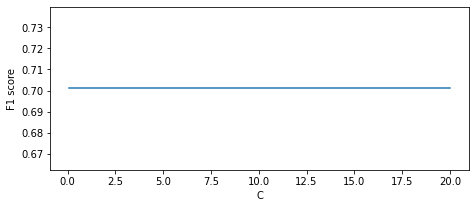

In [ ]:
# C
tes = [0.1, 1, 10, 20]
scores = []
for C in tes:
    clf = XGBClassifier(C=C).fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test) # using the model on a test set
    score = f1_score(y_test, y_pred)
    scores.append(score)
    print("C: {:.2f} / ".format(C) + "F1 score (test data): %0.2f" % (score))

plt.figure(figsize = (7.5,3))
plt.xlabel('C')
plt.ylabel('F1 score')
plt.plot([0.1, 1, 10, 20], scores)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[15:02:05] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
gamma: 1.00 / F1 score (test data): 0.70
/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when

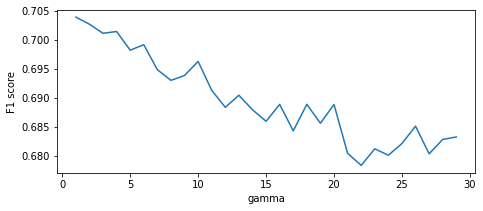

In [ ]:
# gamma
tes = np.arange(1, 30)
scores = []
for gamma in tes:
    clf = XGBClassifier(gamma=gamma).fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test) # using the model on a test set
    score = f1_score(y_test, y_pred)
    scores.append(score)
    print("gamma: {:.2f} / ".format(gamma) + "F1 score (test data): %0.2f" % (score))

plt.figure(figsize = (7.5,3))
plt.xlabel('gamma')
plt.ylabel('F1 score')
plt.plot(tes, scores)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[14:51:29] WARNING: ../src/learner.cc:541: 
Parameters: { max_iter } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:51:30] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like 

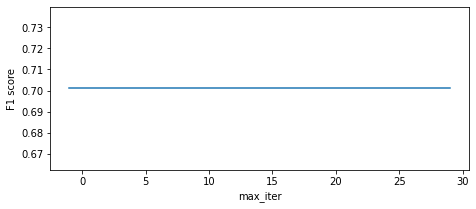

In [ ]:
# max_iter
tes = np.arange(-1, 30) 
scores = []
for max_iter in tes:
    clf = XGBClassifier(max_iter=max_iter).fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test) # using the model on a test set
    score = f1_score(y_test, y_pred)
    scores.append(score)
    print("C: {:.2f} / ".format(max_iter) + "F1 score (test data): %0.2f" % (score))

plt.figure(figsize = (7.5,3))
plt.xlabel('max_iter')
plt.ylabel('F1 score')
plt.plot(tes, scores)

/root/venv/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
[15:12:37] WARNING: ../src/learner.cc:541: 
Parameters: { kernel } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:12:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to

<AxesSubplot:xlabel='kernel', ylabel='F1 score'>

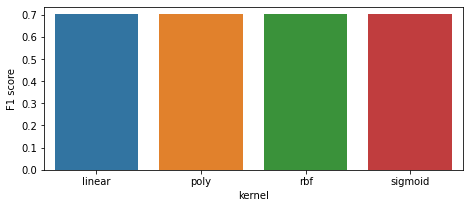

In [ ]:
# kernel
tes = ['linear', 'poly', 'rbf', 'sigmoid']
scores = []
for kernel in tes:
    clf = XGBClassifier(kernel=kernel).fit(X_train_resampled, y_train_resampled)
    y_pred = clf.predict(X_test) # using the model on a test set
    score = f1_score(y_test, y_pred)
    scores.append(score)
    print("kernel: {:.2s} / ".format(kernel) + "F1 score (test data): %0.2f" % (score))

plt.figure(figsize = (7.5,3))
plt.xlabel('kernel')
plt.ylabel('F1 score')
sns.barplot(tes, scores)